# Twitter Sentiments Analysis (NLP)

## Overview :
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are two tweets in this dataset: Positive and Negative.
### This dataset is the collection of 29530 unique tweets.


## About Dataset :

### Context
This dataset contain the data of tweets which are either racist or not racist.

### Content
1. id : Tweets ID

2. label : 1 -> denotes the tweet is racist/sexist 0 -> denotes the tweet is not racist

3. tweet : Content of tweets


### Follow STEPS:

1. Tweet Data

2. Data preprocessing

3. Train Test Spilt

4. Logistic Regression model

5. New data

6. Trained Logistic Regression model

7. Positive Tweet (or) Negative Tweet (PREDICTION)

## Importing the necessary libraries

In [183]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string 
import nltk

import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [184]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Datatype info

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Shape of the dataset 

In [186]:
df.shape

(31962, 3)

## Data Preprocessing the dataset

In [187]:
df.head()  # read first 5 rows

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [188]:
df.tail() # Read last 5 rows

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


### 1. Remove pattern in the input text

In [189]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [227]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct and selfish drag hi kid i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit can't use caus they don...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: societi now #motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner the airwav tri wrap herself th...
31959,31960,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #templ vandalis #calgary, #wso condemn act"


### 2. Remove twitter handles (@user)

In [190]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [191]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


### 3. Remove special characters, numbers and punctuations

In [192]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-z A-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


### 4. Remove twitter handles (@user)

In [193]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : " ".join([w for w in x.split() if (len(w)>2)]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish drags hi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit can't use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


### Individual words considerend as tokens

In [194]:
tokenized_tweet = df['clean_tweet'].apply(lambda x : x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, and, selfish, dr...
1    [thanks, for, #lyft, credit, can't, use, cause...
2                              [bihday, your, majesty]
3    [#model, love, take, with, all, the, time, urð...
4             [factsguide:, society, now, #motivation]
Name: clean_tweet, dtype: object

### Stem the words

In [195]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, and, selfish, drag, h...
1    [thank, for, #lyft, credit, can't, use, caus, ...
2                              [bihday, your, majesti]
3    [#model, love, take, with, all, the, time, urð...
4                  [factsguide:, societi, now, #motiv]
Name: clean_tweet, dtype: object

### Combine words into single sentence

In [196]:

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()
    

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct and selfish drag hi kid i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit can't use caus they don...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: societi now #motiv


## Exploratory Data Analysis

### !pip install wordcloud

### visualize the frequent words

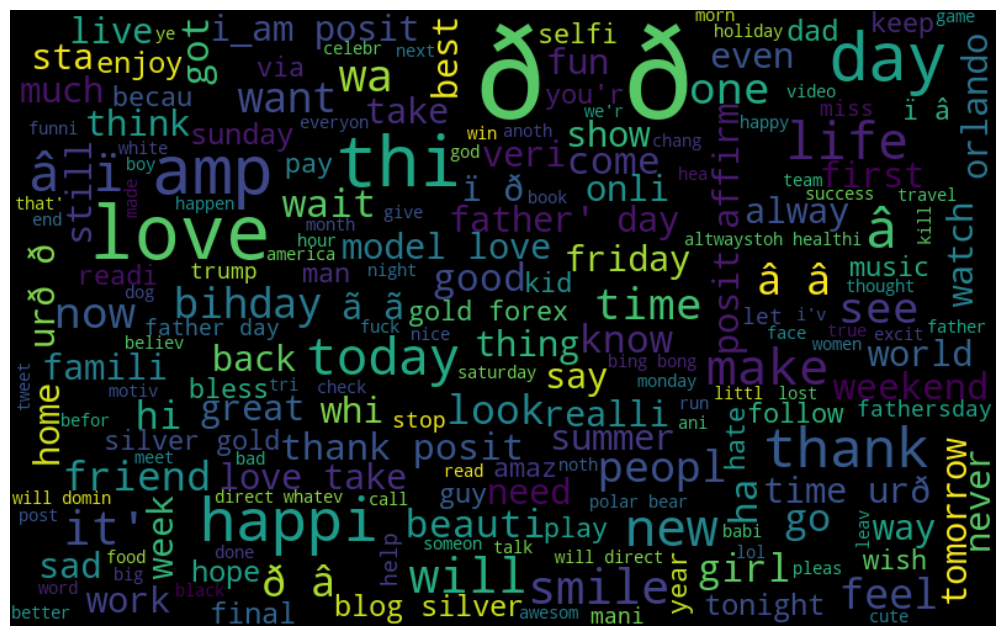

In [197]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500 , random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


### 1. Visualization for positive words

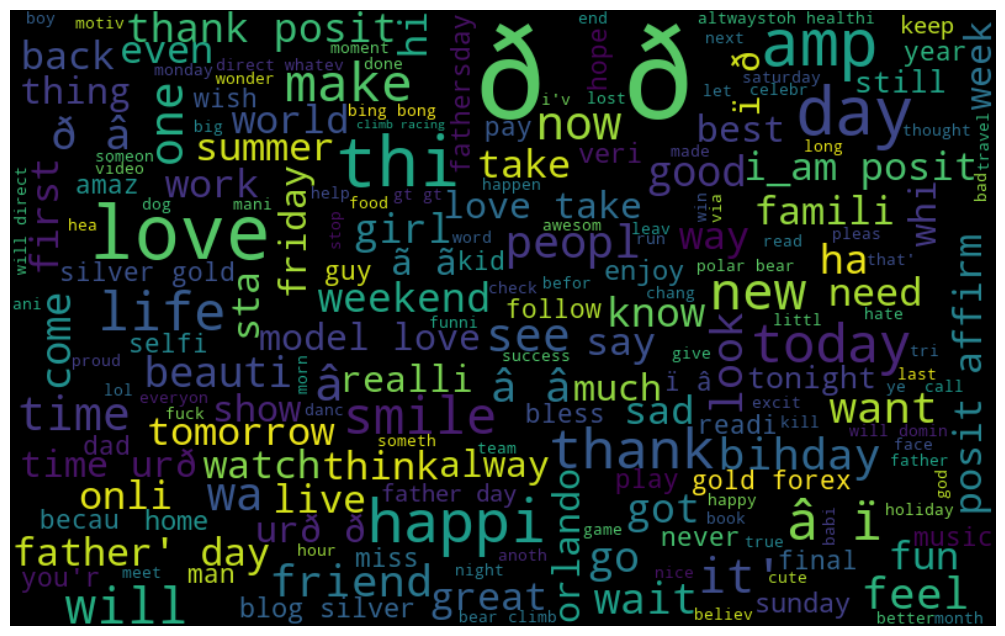

In [198]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500 , random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


### 2. Visualization for negative words

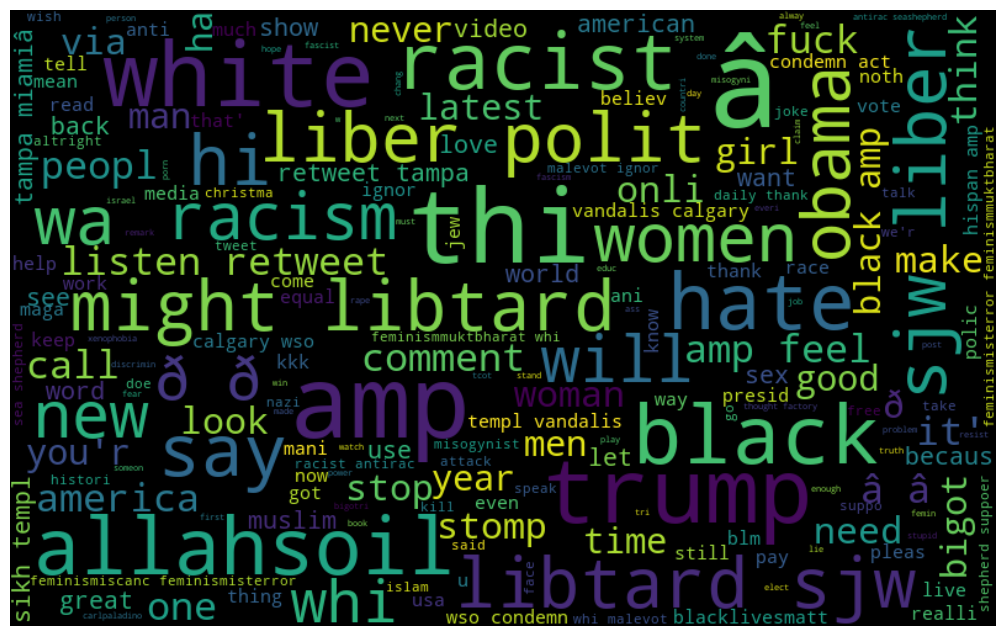

In [199]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500 , random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


## Extract the hashtag

In [200]:
def hashtag_extract(tweet):
    hashtags = []
    # Loop words in the tweet
    for tweets in tweet:
        ht = re.findall(r"#(\w+)", tweets)
        hashtags.append(ht)
    return hashtags

### 1.  Extract hashtags from non racist/sexist tweets

In [201]:
ht_positive = hashtag_extract(df['clean_tweet'][df['label'] == 0])
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['80day', 'gettingf'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro2016'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift1989'],
 ['tra

### 2.  Extract hashtags from racist/sexist tweets

In [202]:
ht_negative= hashtag_extract(df['clean_tweet'][df['label'] == 1])
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 ['2016'],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p2', 'p21', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'miamiâ'],
 ['allahsoil'],
 [],
 ['prais', 'clevelan

### Display list of first 5 positive hashtag for easy to understand

In [203]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

### Display list of first 5 neagtive hashtag for easy to understand

In [204]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

### Unrest list

In [205]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

### Display Single list of first 5 positive hashtag 

In [206]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

### Display Single list of first 5 negative hashtag 

In [207]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

## Using NLP

### 1. Freuency of Positive hashtag

In [208]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count' : list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


### Display barplot to Select top 10 positive hashtags 

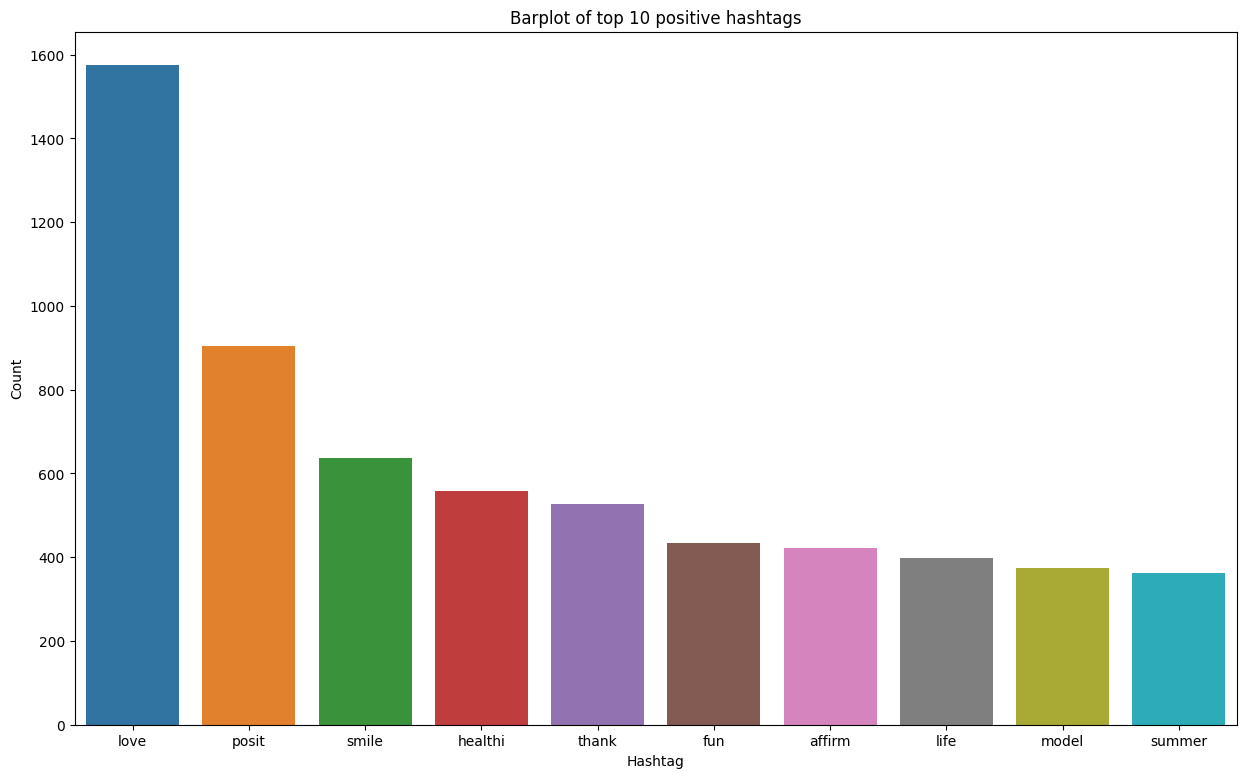

In [209]:
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.title("Barplot of top 10 positive hashtags")
plt.show()

'observation':

In top 10 'positive' hashtags or non racist/sexist tweets
- 'love' is highest around 1550.
- 'summer' is least around 40.

### 2. Frequency of negative hashtag

In [210]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count' : list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


### Display the barplot to Select top 10 negative hashtags 

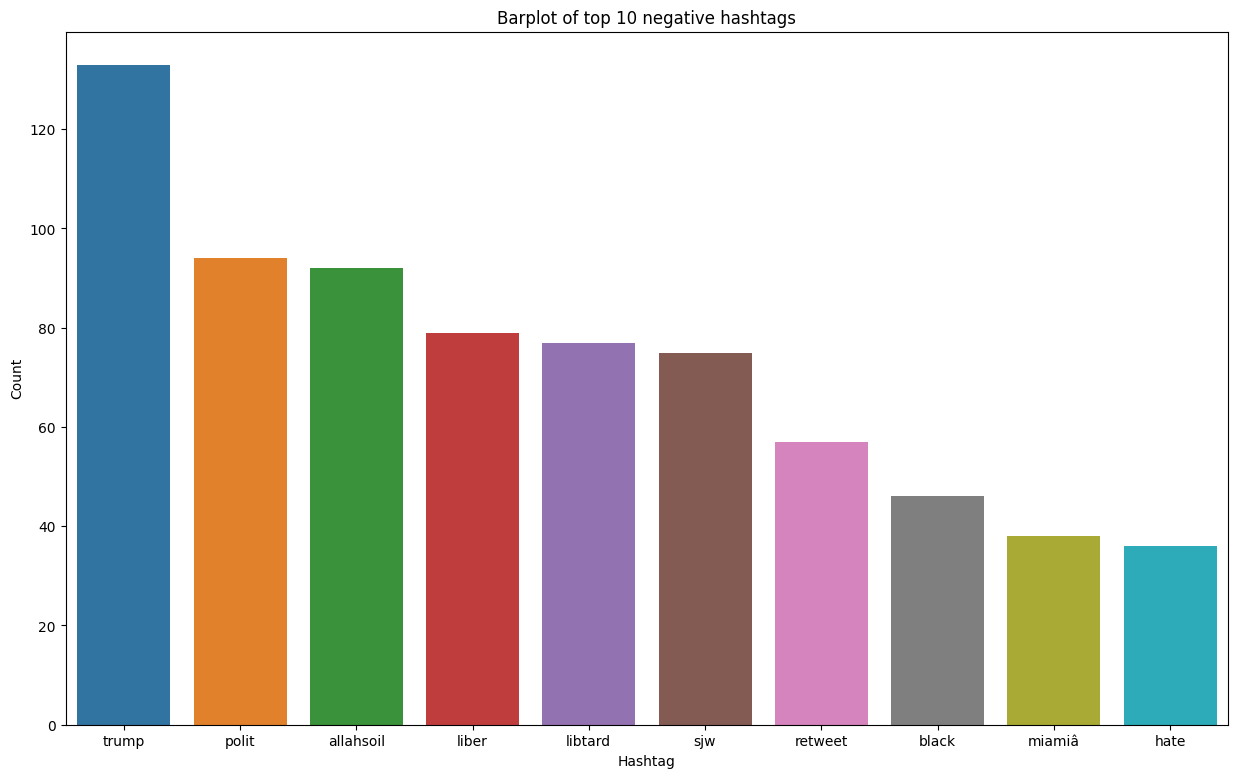

In [211]:
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.title("Barplot of top 10 negative hashtags")
plt.show()

'observation':

In top 10 'negative' hashtags or racist/sexist tweets
- 'trump' is highest above 130
- 'hate' is least around 40

## Input split

### Feature Extraction

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [213]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 134824 stored elements in Compressed Sparse Row format>

# bow[0].toarray()

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['label'], random_state = 43, test_size = 0.25)

## Model Training

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [217]:
model = LogisticRegression()
model

LogisticRegression()

In [218]:
model.fit(X_train, y_train)

LogisticRegression()

In [219]:
pred = model.predict(X_test)
f1_score(y_test, pred)

0.5054945054945055

In [220]:
accuracy_score(y_test, pred)

0.9493179827305719

## Use probability to get output

In [221]:
pred_prob = model.predict_proba(X_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)

0.5903257650542941

In [222]:
accuracy_score(y_test, pred)

0.9480665748967588

In [223]:
from sklearn.metrics import classification_report, accuracy_score

In [224]:

score = accuracy_score(y_test, pred)
print("\nAccuracy score :", score*100)
report = classification_report(y_test, pred)
print("\nClassification Report :\n", report)


Accuracy score : 94.80665748967589

Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      7433
           1       0.66      0.54      0.59       558

    accuracy                           0.95      7991
   macro avg       0.81      0.76      0.78      7991
weighted avg       0.94      0.95      0.95      7991



## Pie chart 

In [225]:
df['label'].value_counts(normalize=True)

label
0    0.929854
1    0.070146
Name: proportion, dtype: float64

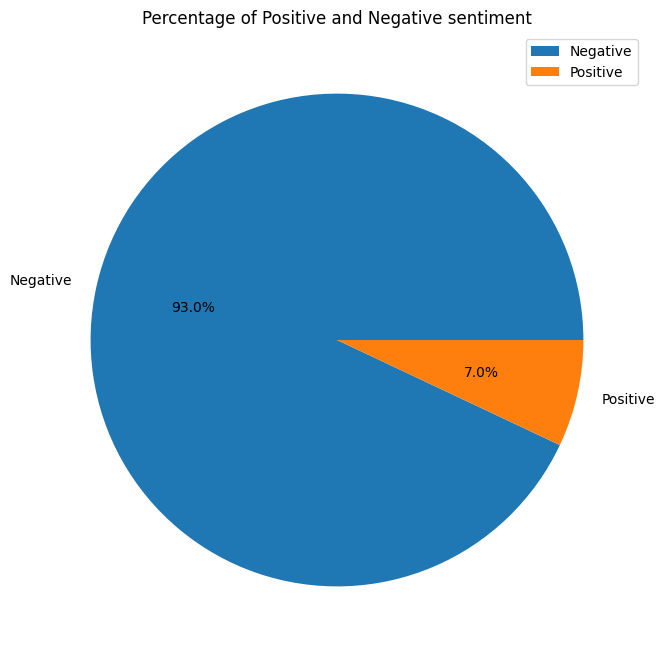

In [226]:
plt.figure(figsize=(10,8))
plt.pie(df['label'].value_counts(),labels=['Negative','Positive'],autopct='%1.1f%%')
plt.title("Percentage of Positive and Negative sentiment")
plt.legend()
plt.show()

'Observation:'

- 93% people have negative sentiments or racist/sexist tweets
- 7% people have positive sentiments or non racist/sexist tweets

- Number of Negative Sentiments are greater than Positive sentiments

## Conclusion :

In this project, I used machine learning algorithms for Twitter Sentiments Analysis :

- Logistic Regression:
    - Accuracy: 95%

     
- 93% people have negative sentiments or racist/sexist tweets
- 7% people have positive sentiments or non racist/sexist tweets
  
- Number of Negative Sentiments are greater than Positive sentiments


- In top 10 'positive hashtags' or non racist/sexist tweets
    - 'love' is highest around 1550.
    - 'summer' is least around 40.


- In top 10 'negative hashtags' or racist/sexist tweets
    - 'trump' is highest above 130
    - 'hate' is least around 40

  
                             
Logistic Regression slightly performed very well , indicating it was better suited for this dataset. However, The model demonstrated strong performance, confirming the effectiveness of these techniques for Twitter Sentiments Analysis. Future work could explore other advanced algorithms to further improve accuracy.
